Imports

In [2]:
from parameters_U233 import *
import numpy as np
import matplotlib.pyplot as plt
from jitcdde import t
from msrDynamics.objects import Node, System
import pandas as pd

In [10]:
# unpack ORNL data
df_ORNL_mag = pd.read_csv(f"./data/ORNL_msre_{int(P)}MW_U233_magnitude.csv",names=['f','mag'])
df_ORNL_mag = df_ORNL_mag.sort_values(df_ORNL_mag.columns[0])
df_ORNL_phase = pd.read_csv(f"./data/ORNL_msre_{int(P)}MW_U233_phase.csv",names=['f','phase'])
df_ORNL_phase = df_ORNL_phase.sort_values(df_ORNL_phase.columns[0])
#df_jit = pd.read_csv(f"ORNL_msre_{int(P)}MW_U233_output.csv")
df_jit = pd.read_csv(f"frequency_response_results.csv")

In [1]:
plt.plot(df_jit['Frequency'],[m for m in df_jit['Gain']])
plt.scatter(df_ORNL_mag['f'],df_ORNL_mag['mag'],marker="x")
plt.yscale("log")
plt.xscale("log")
plt.xlim([1e-2,1e0])

# plt.plot(df_jit['Frequency'],[m for m in df_jit['Phase Shift']])
# plt.yscale("log")
# plt.xscale("log")
#plt.xlim([1e-2,3e-1])

NameError: name 'plt' is not defined

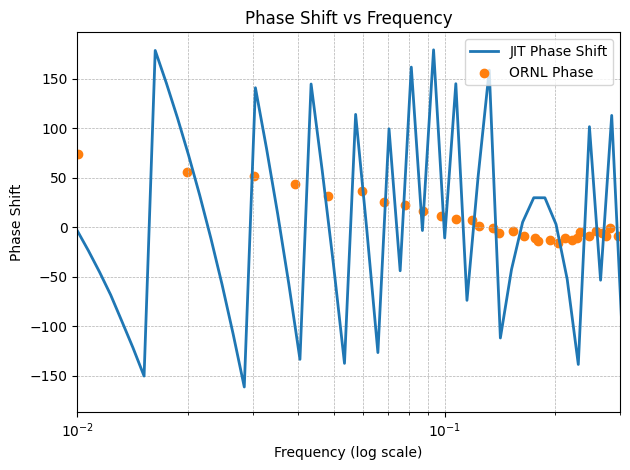

In [21]:

# Set a professional color scheme
colors = ['tab:blue', 'tab:orange']

# Function to update the style of the axis
def update_axis_style(ax, title, x_label='', y_label='', x_ticks=True):
    ax.set_xscale("log")
    ax.set_xlim([1e-2, 3e-1])
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)

# Create a single plot
fig, ax = plt.subplots()

# Plotting data
ax.plot(df_jit['Frequency'], df_jit['Phase Shift'], label='JIT Phase Shift', color=colors[0], linewidth=2)
ax.scatter(df_ORNL_phase['f'], df_ORNL_phase['phase'], label='ORNL Phase', color=colors[1], marker='o',)

# Updating the style of the plot
update_axis_style(ax, 'Phase Shift vs Frequency', 'Frequency (log scale)', 'Phase Shift')

# Adding legend
ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
